In [1]:
from functions import *
from methods import *
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
path = '/Users/irashokar/documents/NOvA/files/'
with open(path + 'history_32_2_LR_0.0001.pkl','rb') as f1:
    history = pkl.load(f1)

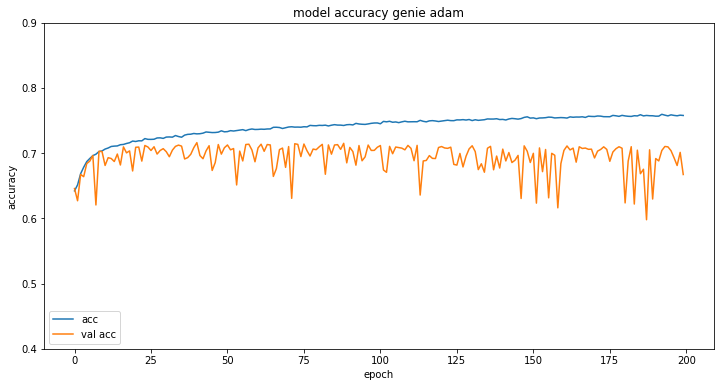

In [3]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy genie adam')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val acc'], loc='lower left')
plt.ylim(0.4,0.9)
plt.show()

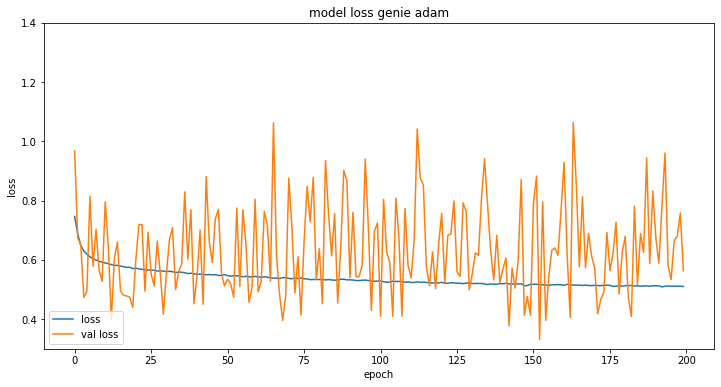

In [4]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss genie adam')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val loss'], loc='lower left')
plt.ylim(0.3,1.4)
plt.show()

In [5]:
with open(path+ 'probabilities_weights_32_2_LR_0.0001.pkl','rb') as f2:
    probabilities = pkl.load(f2)
print(len(probabilities))
with open(path+ 'test_labels_list_weights_32_2_LR_0.0001.pkl','rb') as f3:
    test_labels = pkl.load(f3)
print(len(test_labels))
gibuu_weights = [1]*len(test_labels)

93248
93280


In [6]:
predictions = []
for i in probabilities:
    max_index =np.where(i == np.max(i))[0][0]
    predictions.append(max_index)
    
test_vals = []
for i in test_labels:
    max_index =np.where(i == np.max(i))[0][0]
    test_vals.append(max_index)
    
#accuracy
acc = 0
for i in range(len(probabilities)):
    if test_vals[i]==predictions[i]:
        acc+=1
    else:
        pass
acc/=len(test_vals)

true_val = probabilities

print('Probabilities: \n')
print('Accuracy:{} \n'.format(acc))
for i in range(10):
    print(probabilities[i], '\n')
print('Predictions: \n')
print(predictions[:10], '\n')
print('Truth labels: \n')
print(test_vals[:10])

Probabilities: 

Accuracy:0.6724163807890223 

[0.67239136 0.02277899 0.3048296 ] 

[0.13238437 0.00529652 0.86231905] 

[0.29967874 0.01151793 0.6888033 ] 

[0.02116834 0.00146014 0.9773716 ] 

[0.5111774  0.00752991 0.48129258] 

[0.43684098 0.01415649 0.5490025 ] 

[0.44261235 0.08934419 0.46804357] 

[0.8082579  0.01117395 0.18056816] 

[0.05856198 0.00427873 0.93715924] 

[0.32954264 0.00233001 0.6681274 ] 

Predictions: 

[0, 2, 2, 2, 0, 2, 2, 0, 2, 2] 

Truth labels: 

[0, 2, 2, 2, 2, 2, 2, 0, 2, 2]


Text(0, 0.5, 'Count')

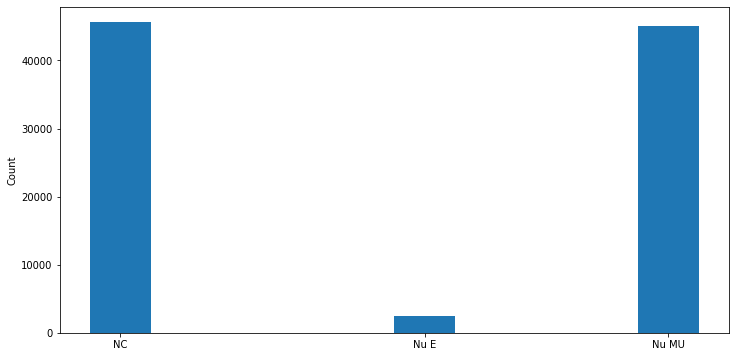

In [7]:
plt.figure(figsize=(12,6))
plt.hist(predictions)
x = [0.1, 1.1, 1.9]
class_names = ['NC', 'Nu E', 'Nu MU']
plt.xticks(x, class_names)
plt.ylabel('Count')

[(0, 1)]

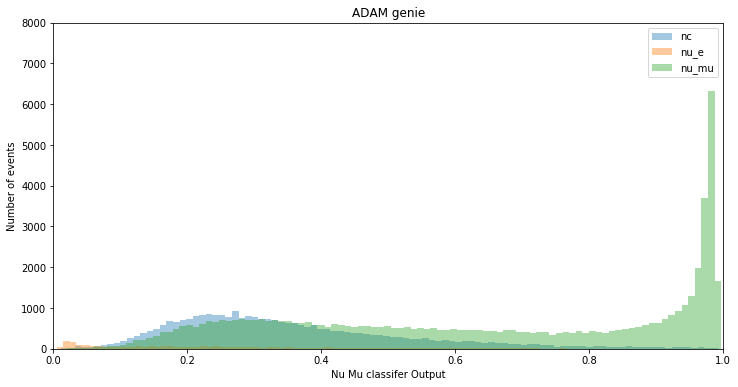

In [8]:
mu_e = []
nc = []
nu_mu = []
for i in range(len(probabilities)):
    if test_vals[i] ==0:
        nc.append(probabilities[i,2])
    elif test_vals[i] ==1:
        mu_e.append(probabilities[i,2])
    elif test_vals[i] ==2:
        nu_mu.append(probabilities[i,2])
        
plt.figure(figsize=(12,6))
g = sns.distplot(nc, bins = 100, kde=False)
g = sns.distplot(mu_e, bins = 100, kde=False)
g = sns.distplot(nu_mu, bins = 100, kde=False)
plt.legend(['nc', 'nu_e','nu_mu'], loc='upper right')
plt.xlabel('Nu Mu classifer Output')
plt.ylabel('Number of events')
plt.title('ADAM genie')
g.set(ylim=(0,8000))
g.set(xlim=(0,1))

[(0, 1)]

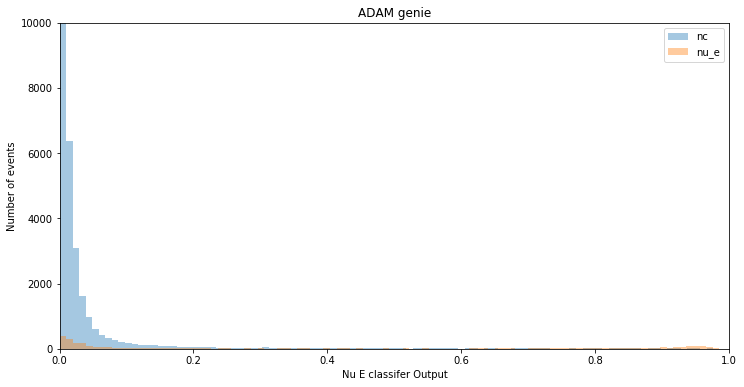

In [35]:
mu_e = []
nc = []
nu_mu = []
for i in range(len(probabilities)):
    if test_vals[i] ==0:
        nc.append(probabilities[i,1])
    elif test_vals[i] ==1:
        mu_e.append(probabilities[i,1])
    elif test_vals[i] ==2:
        nu_mu.append(probabilities[i,1])
        
plt.figure(figsize=(12,6))
g = sns.distplot(nc, bins = 100, kde=False)
g = sns.distplot(mu_e, bins = 100, kde=False)
#g = sns.distplot(nu_mu, bins = 100, kde=False)
plt.legend(['nc', 'nu_e','nu_mu'], loc='upper right')
plt.xlabel('Nu E classifer Output')
plt.ylabel('Number of events')
plt.title('ADAM genie')
g.set(ylim=(0,10000))
g.set(xlim=(0,1))

In [28]:
purity_list = []
efficiency_list = []
p_x_e_list = []
 
for j in np.arange(0, 0.99, 0.01):
    nu_mu_above = []
    nu_mu_below = []
    nc_above = []
    nc_below = []
    nu_e_above = []
    nu_e_below = []
    for i in range(len(probabilities)):
        if test_vals[i] ==2:
            if probabilities[i,2]>=j:
                nu_mu_above.append(probabilities[i,2]*gibuu_weights[i])
            elif probabilities[i,2]<=j:
                nu_mu_below.append(probabilities[i,2]*gibuu_weights[i])
                
        elif test_vals[i] ==0:         
            if probabilities[i,2]>=j:
                nc_above.append(probabilities[i,2]*gibuu_weights[i])
            elif probabilities[i,2]<=j:
                nc_below.append(probabilities[i,2]*gibuu_weights[i])
                
        elif test_vals[i] ==1:        
            if probabilities[i,2]>=j:
                nu_e_above.append(probabilities[i,2]*gibuu_weights[i])
            elif probabilities[i,2]<=j:
                nu_e_below.append(probabilities[i,2]*gibuu_weights[i])
                
        
                
    purity = len(nu_mu_above)/(len(nc_above)+len(nu_mu_above)+len(nu_e_above))
    purity_list.append(purity)

    efficiency = len(nu_mu_above)/(len(nu_mu_above)+len(nu_mu_below))
    efficiency_list.append(efficiency)

    p_x_e_list.append(purity*efficiency)
    


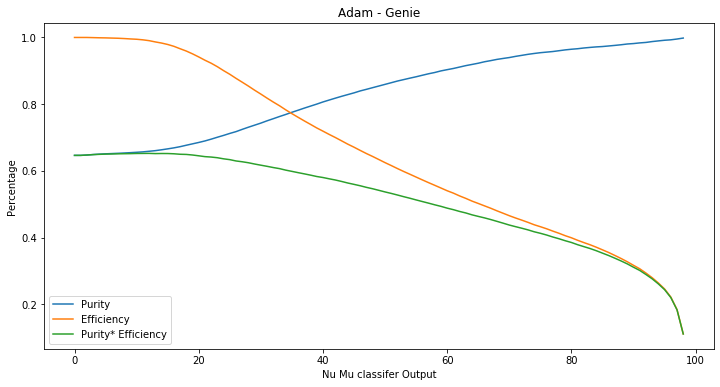

In [29]:
plt.figure(figsize=(12,6))
plt.plot(purity_list)
plt.plot(efficiency_list)
plt.plot(p_x_e_list)
plt.xlabel('Nu Mu classifer Output')
plt.ylabel('Percentage')
plt.title('Adam - Genie')
plt.legend(['Purity', 'Efficiency', 'Purity* Efficiency'], loc='lower left')

In [30]:
purity_list = []
efficiency_list = []
p_x_e_list = []
 
for j in np.arange(0, 0.9, 0.01):
    nu_mu_above = []
    nu_mu_below = []
    nc_above = []
    nc_below = []
    nu_e_above = []
    nu_e_below = []
    for i in range(len(probabilities)):
        if test_vals[i] ==2:
            if probabilities[i,1]>=j:
                nu_mu_above.append(probabilities[i,1]*gibuu_weights[i])
            elif probabilities[i,1]<=j:
                nu_mu_below.append(probabilities[i,1]*gibuu_weights[i])
            
                
        elif test_vals[i] ==0:         
            if probabilities[i,1]>=j:
                nc_above.append(probabilities[i,1]*gibuu_weights[i])
            elif probabilities[i,1]<=j:
                nc_below.append(probabilities[i,1]*gibuu_weights[i])
            
                
        elif test_vals[i] ==1:        
            if probabilities[i,1]>=j:
                nu_e_above.append(probabilities[i,1]*gibuu_weights[i])
            elif probabilities[i,1]<=j:
                nu_e_below.append(probabilities[i,1]*gibuu_weights[i])
            count_nu_e+=1
                
        
                
    purity = len(nu_e_above)/(len(nc_above)+len(nu_mu_above)+len(nu_e_above))
    purity_list.append(purity)

    efficiency = len(nu_e_above)/(len(nu_e_above)+len(nu_e_below))
    efficiency_list.append(efficiency)

    p_x_e_list.append(purity*efficiency)
    


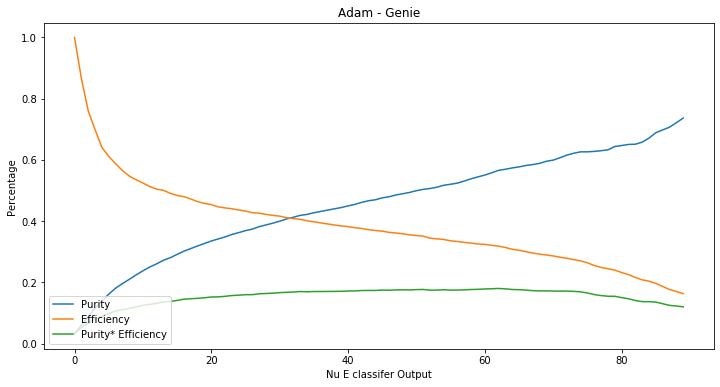

In [31]:
plt.figure(figsize=(12,6))
plt.plot(purity_list)
plt.plot(efficiency_list)
plt.plot(p_x_e_list)
plt.xlabel('Nu E classifer Output')
plt.ylabel('Percentage')
plt.title('Adam - Genie')
plt.legend(['Purity', 'Efficiency', 'Purity* Efficiency'], loc='lower left')

adam_purity_list = purity_list
adam_efficiency_list = efficiency_list
adam_p_x_e_list = p_x_e_list

with open(path+ 'adam_pur_eff.pkl','wb') as f1:
    pkl.dump([adam_purity_list, adam_efficiency_list, adam_p_x_e_list], f1)